In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from DatasetAPPM import DatasetAPPM
from Nets import TheNet
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import sys
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import scikitplot as skplt
import seaborn as sns
import pandas as pd
import torch.nn.functional as F

In [3]:
def class_to_id(classes):

  class_id = {'ALA' : 0, 'ARG' : 1, 'ASN' : 2, 'ASP' : 3, 'CYS' : 4, 'GLU' : 5,
         'GLN' : 6, 'GLY' : 7, 'HIS' : 8, 'ILE' : 9, 'LEU' : 10, 'LYS' : 11,
         'MET' : 12, 'PHE' : 13, 'PRO' : 14, 'SER' : 15, 'THR' : 16, 'TRP' : 17, 'TYR' : 18,
         'VAL' : 19}

  for i in range(0,len(classes)):
    classes[i] = class_id[classes[i]]

  return classes
        
def id_to_class(ids):

  id_class = {0 : 'ALA', 1 : 'ARG', 2 : 'ASN', 3 : 'ASP', 4 : 'CYS', 5 : 'GLU',
          6 : 'GLN', 7 : 'GLY', 8 : 'HIS', 9 : 'ILE', 10 : 'LEU', 11 : 'LYS',
          12 : 'MET', 13 : 'PHE', 14 : 'PRO', 15 : 'SER', 16 : 'THR', 17 : 'TRP', 18 : 'TYR',
          19 : 'VAL'}

  for i in range(0,len(ids)):
    ids[i] = id_class[ids[i]]

  return ids

In [40]:
class TheNet(nn.Module):

    def __init__(self,p=0.0):
        super(TheNet, self).__init__()
        self.p = p
        
        #Convolution Layers
        self.conv1 = nn.Conv3d(4, 6, 7)
        self.conv2 = nn.Conv3d(6, 16, 7)
        self.conv3 = nn.Conv3d(16, 16, 7)
        self.conv4 = nn.Conv3d(16, 16, 7)

        #Fully connected layers
        self.fc1 = nn.Linear(16 * 6 * 6 * 6, 30)  
        self.fc2 = nn.Linear(30, 20)

        #Dropout layers Definition
        self.drop1 = nn.Dropout(p=self.p)
    
    def forward(self, x):
        x = (F.leaky_relu(self.conv1(x)))
        x = (F.leaky_relu(self.conv2(x)))
        x = (F.leaky_relu(self.conv3(x)))
        x = (F.leaky_relu(self.conv4(x)))
        x = x.view(-1, self.num_flat_features(x))
        x = F.leaky_relu(self.drop1(self.fc1(x))) #Dropout layer after activation, unless it's ReLu(Can acquire better performance)
        x = self.fc2(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
             num_features *= s
        return num_features

# For unbalanced database use this cell

In [41]:
'''
classes = ['ALA','ARG','ASN','ASP','CYS','GLU','GLN','GLY','HIS','ILE','LEU','LYS','MET','PHE','PRO','SER','THR','TRP','TYR','VAL']

print('USING UNBALANCED DATABASE')

testset_path = '/home/paulo/Documents/BD/10%_top8000_50hom_discretized_full_train60_20_20/test/'
weights_path = '/home/paulo/Documents/TCC/experiments/TheNet-arch3/fc60-drop=0,5-db=balanced10%-batch=256-Adam-lr=0,0001-epcs=200/'
'''

"\nclasses = ['ALA','ARG','ASN','ASP','CYS','GLU','GLN','GLY','HIS','ILE','LEU','LYS','MET','PHE','PRO','SER','THR','TRP','TYR','VAL']\n\nprint('USING UNBALANCED DATABASE')\n\ntestset_path = '/home/paulo/Documents/BD/10%_top8000_50hom_discretized_full_train60_20_20/test/'\nweights_path = '/home/paulo/Documents/TCC/experiments/TheNet-arch3/fc60-drop=0,5-db=balanced10%-batch=256-Adam-lr=0,0001-epcs=200/'\n"

# For balanced database use this cell

In [42]:

classes = ['ALA','ARG','ASN','ASP','CYS','GLU','GLN','GLY','HIS','ILE','LEU','LYS','MET','PHE','PRO','SER','THR','TRP','TYR','VAL']

print('USING BALANCED DATABASE')

testset_path = '/home/paulo/Documents/BD/balanced_8000perClass_top8000_50hom_discretized_full_train60_20_20/test/'
weights_path = '/home/paulo/Documents/TCC/experiments/TheNet-arch3/fc30-drop=0,5-db=balanced10%-batch=256-Adam-lr=0,0001-epcs=200/'


USING BALANCED DATABASE


cuda:0
Loading trainset...
Validationset loaded.
Neural network evaluation mode activated!!!
Labels:  tensor([ 3, 19, 19,  2,  7, 11,  9, 16, 16, 11, 15,  7,  7, 19,  0,  0, 10, 10,
        10, 14, 13, 14,  2, 15,  7,  3, 19,  2, 11,  5,  0, 10,  7, 15,  3, 13,
         0,  3,  7, 14, 10,  9,  0, 19, 10, 14, 19,  9, 10,  3,  6,  7,  7,  0,
        18, 18, 11, 11,  1, 15, 10, 11,  5, 11, 19,  8,  0,  7, 11, 16,  9,  5,
        19,  7,  4, 14,  5, 14, 18, 11, 16,  0, 12, 16,  5,  7, 12, 15,  9,  9,
         7,  7,  5, 15,  7, 10, 16,  7,  3,  6, 16,  8,  5,  6, 17,  7,  3, 11,
         7,  3, 13, 15, 11,  7,  7, 18,  3,  8, 13, 11, 12,  9,  1, 19,  0, 11,
        16, 19, 19, 14,  0,  1, 16,  2,  4, 10, 15,  0, 13,  5, 19,  7,  5,  0,
        10, 14,  5, 15,  9, 16, 13,  7,  3,  1, 19,  9,  7,  0,  3,  5,  9,  1,
        10, 16, 16,  5,  0, 14, 15,  6,  6,  6, 19,  1,  3,  9, 11, 16,  9, 11,
        16, 16, 15,  5, 11,  5, 10, 19,  2,  9,  0,  7, 10,  3, 10, 13, 14,  4,
        10,  5,  0

Labels:  tensor([ 3, 15, 10, 18, 15,  5, 19, 15, 15, 15, 15, 16,  8,  9, 15,  0, 19,  0,
         5,  0, 10, 13, 13, 11,  2, 16, 11, 19,  3,  2,  0, 11,  7,  0, 12, 18,
         7,  5, 16,  7, 12,  6,  6,  1, 10,  5,  7,  2, 13,  5, 10,  3, 10, 17,
         5, 11, 10,  3, 16, 15,  1,  6, 17, 11, 10,  3, 11,  1,  8, 19,  7,  6,
         0,  7,  9,  7,  7, 15,  4, 10,  5,  6,  3,  6, 19,  3,  2, 16, 19, 13,
        15, 19,  0, 10, 10, 11, 19,  0,  6, 19,  8, 10,  0,  0,  0,  5,  3,  5,
         0, 10,  3, 19, 19,  6, 10,  5,  8, 12,  7,  0,  5, 14,  7, 10, 15, 11,
        10,  5, 12, 12,  9, 11,  3, 18, 19, 19, 19, 11,  0, 10, 14, 16, 14, 16,
         5,  0,  7, 13,  7, 16, 10,  8,  1, 19,  6,  0, 17, 19, 12,  7,  2, 15,
        18,  0,  9,  1,  1,  9,  7, 10,  1, 10, 10, 13, 10,  5, 16, 10, 10,  0,
         9, 14, 16, 18,  0, 11,  3,  3,  9,  9, 10,  3,  9,  1,  0, 16, 10, 16,
        16,  0,  3,  7,  9, 15, 19, 11, 15, 15, 16, 19, 14,  7, 10,  3, 14,  6,
         0,  0,  9, 17,  8, 11,

Labels:  tensor([19,  0, 15,  7,  3,  7,  8,  7,  7, 16, 15, 16, 19, 11,  2,  3, 14,  3,
         5,  3,  0, 14, 16,  6,  6,  0, 19, 19, 19,  9,  2, 13,  3,  0,  7, 15,
        18,  2,  9, 17, 13,  3,  1, 15, 11,  6,  7,  2, 18, 15, 15, 10, 18,  9,
        14, 19, 18,  2, 18, 18,  7, 15,  7, 14,  7, 10, 13,  7, 10, 15, 15, 10,
         7, 15,  9,  9,  9, 10,  5, 10, 16,  6, 16,  3,  5, 19, 18, 11, 13,  5,
        18,  3,  8,  9,  8,  1,  0,  3,  1,  0,  8, 19,  0,  2,  6,  7,  5,  7,
         3,  3,  3, 13, 10, 19,  7,  3, 15, 13,  6, 18, 18, 16,  7,  9,  9,  7,
        15,  6,  1, 16,  2,  0,  6,  5,  7,  7,  6, 19, 19,  9, 13,  1,  6,  0,
         0,  1, 16, 18, 15,  3,  3, 13, 18,  0, 13, 10,  0, 15,  5, 13, 10,  0,
         6,  5,  7, 19, 19,  1,  0,  2, 13, 16, 18,  9, 10,  7, 16,  3, 14, 16,
        19,  5, 14,  7, 13, 10, 14,  5, 14, 11,  0, 19,  0,  0, 11,  5, 17, 14,
        11, 15, 14,  1, 14,  7,  0,  3, 16,  0,  7, 17, 15, 10,  3,  7, 12, 11,
         2, 19, 19, 10,  0,  8,

Labels:  tensor([ 2, 11,  0, 16, 16,  8, 13,  5, 10, 17,  5,  8,  1,  6,  3,  0,  3, 10,
         9, 16, 12,  0, 10,  3,  9, 10,  1,  3, 15, 16,  9,  0,  1,  6,  3,  9,
         7, 10,  2,  7, 19,  0, 14,  1,  7, 14,  0, 19, 16, 11,  3,  1,  1, 14,
        10, 14,  2,  7,  0, 10, 11,  4,  5, 18,  0,  3,  7,  7,  9, 16,  9, 10,
         7, 11,  9, 16,  0,  0,  7, 11,  5, 11,  5, 16,  7,  7, 16, 16,  7,  1,
         4,  5,  2,  1,  1, 11, 13,  1, 12,  9, 13,  7, 15,  6, 10,  9,  2, 16,
         5, 18,  2,  5, 11,  6,  7, 13,  7,  9,  8,  9,  5,  1, 13,  3, 14,  5,
         2, 19, 11, 18, 19, 10, 14, 15, 16,  2,  9, 17,  1, 18,  9,  2, 14, 16,
        12,  9,  1, 18,  2, 10,  0,  3,  3, 18, 19,  8, 18,  2,  7,  5,  5, 19,
        11, 14, 11, 13,  5, 10, 11, 11,  5, 11,  0,  5,  9, 11,  5, 18,  3,  5,
         3, 19, 10, 10, 16, 19, 19,  0,  7, 16, 16, 16, 14, 10, 19,  3,  0, 19,
         5,  0,  1,  7,  7,  7, 16,  0, 16,  5,  0,  0,  1, 15,  8, 16, 18,  3,
        11,  3,  7,  1, 17,  6,

Labels:  tensor([12,  1, 11,  5, 16, 11, 10,  1, 15, 10,  3, 10, 15, 10,  6, 19,  6,  8,
        12, 18,  3,  5,  2,  9, 19,  8,  0,  3,  5,  3,  7,  4, 11,  3, 11, 13,
        11, 19,  3, 19, 11, 11,  3,  0, 19, 16, 16, 18,  6,  4,  7, 18,  1,  8,
         9,  3, 12,  2, 17,  0, 13,  5, 16, 13, 15, 19,  7, 19, 10, 10,  7, 10,
         3,  5,  9, 15,  3, 19, 16, 19,  0, 16,  1, 11, 14,  8,  6,  1, 13,  1,
        10, 19,  3,  1, 13,  0,  1, 10,  9,  8, 13,  8, 10, 10, 12,  1, 10, 14,
         0, 10,  7,  1, 11, 11, 18,  7,  5, 10,  3,  1, 12, 16, 13, 14,  3,  9,
        17, 16,  7,  8, 19,  0, 19,  2, 19, 12,  5,  5, 19, 15,  2,  6, 12,  9,
         2,  7, 10,  3, 18, 15, 10,  0,  7,  1, 10,  9,  5, 16,  9,  0,  6, 19,
        10, 19, 19,  4,  7,  1,  0,  0,  7,  0, 19, 19, 16, 10, 14, 12, 10, 10,
         0,  0, 10,  0, 19, 15, 11, 11,  4,  9, 14,  7, 10,  7,  5,  6, 18,  5,
         7,  7,  0, 17, 14,  0,  7, 15,  0, 16,  2,  3,  2,  7,  6,  3,  3, 15,
         9, 17, 10, 15,  7, 19,

tensor([[ -4.1959,  -3.9122,  -1.9357,  ...,   5.1493,   5.1410,   0.4639],
        [ -2.7436,   0.2561,   0.2432,  ...,  -1.7906,  -0.5057,  -2.2530],
        [ -1.0759,   0.1255,   0.4461,  ...,  -2.8486,  -0.7056,  -0.7402],
        ...,
        [  1.0348,  -4.4342,  -0.1715,  ..., -19.7227, -14.8696,   8.8675],
        [ -2.4863,   0.5545,  -0.6231,  ...,  -1.1771,  -0.7911,  -2.3106],
        [ -0.7019,  -3.9677,  -0.2542,  ..., -10.1304,  -3.4530,   4.1404]],
       device='cuda:0')
Labels:  tensor([ 5, 11, 14,  9,  5,  5, 19, 11,  0, 10, 12,  5,  5, 11, 16, 18, 13,  0,
        15,  6,  9,  2,  3, 10,  2, 10,  9, 10,  5, 15, 14, 10, 15, 19,  9,  5,
        12, 15,  3,  3,  0, 18,  2,  6, 11, 18,  1,  9,  1, 10,  6, 19,  0, 13,
        18,  3, 16, 11,  0,  7,  7,  0, 19,  2, 13,  7, 15,  7,  5, 19,  1, 19,
        16,  0, 19,  3, 13, 18,  0, 18, 16,  6,  1,  6, 13,  0, 15,  0, 11,  0,
        10,  5,  3,  9, 16,  0,  5, 14,  6, 15, 15,  0, 11,  0,  7,  0, 11, 13,
         3, 11, 1

tensor([[-1.0285, -1.4856,  1.0897,  ..., -8.7873, -4.7314,  2.2721],
        [ 1.0262, -0.5676, -0.4959,  ..., -1.7203, -2.6060, -4.4379],
        [-1.8682, -0.7528, -0.0284,  ..., -1.9475, -0.4389, -3.5125],
        ...,
        [-2.7727, -0.5872, -2.9853,  ...,  2.3672,  2.1955,  2.2106],
        [ 0.0741, -0.0714, -0.6974,  ..., -0.5140, -1.2075, -2.9668],
        [-1.9364,  0.4146,  0.4341,  ...,  0.7357, -0.3808, -2.3096]],
       device='cuda:0')
Labels:  tensor([ 9, 16, 15,  9,  0, 19,  9, 14,  0,  6, 19,  7,  0, 12,  2,  9,  3, 16,
         5,  2, 18,  9, 18, 11, 10, 15,  8,  5, 11, 10,  8, 15,  0,  8,  0,  9,
         1, 18,  9,  0,  0,  7,  7, 15,  7, 16, 10, 10,  6,  8,  5,  0, 10, 10,
         0, 14,  5,  9,  0, 19, 11, 13,  5, 13,  7, 15, 13, 15, 15, 15,  6,  5,
        16, 10,  2, 13,  8, 18, 14,  2,  7, 14,  4,  9, 19,  9,  7,  1, 15,  2,
        18,  8, 10,  7,  9, 19, 14, 10,  5, 10, 13, 15, 11,  2, 10, 16, 14,  1,
        14,  4,  0,  3,  8, 11, 16,  2,  9,  0,  0, 1

tensor([[-1.0666e+00, -5.4942e-02,  2.0829e+00,  ..., -1.7943e+00,
          8.0799e-03, -2.8030e+00],
        [-1.1063e+00,  6.0097e-02,  2.1273e+00,  ..., -5.4343e+00,
         -3.7386e+00, -3.8350e+00],
        [-8.5268e+00,  2.3565e+00,  3.4905e-01,  ..., -5.5468e+00,
         -6.9143e-01, -3.3053e+00],
        ...,
        [-4.9562e+00, -5.3635e+00, -2.4693e+00,  ..., -2.0426e+00,
          1.7079e+00,  3.9146e+00],
        [-5.6906e-01, -1.6138e+00, -5.9984e-01,  ...,  8.6346e-01,
         -2.4325e-01, -2.9054e+00],
        [ 6.8526e-01,  6.4728e-01,  5.6402e-01,  ..., -2.1732e+00,
         -1.6607e+00, -4.3255e+00]], device='cuda:0')
Labels:  tensor([ 7,  7,  3,  9, 10,  0, 10, 19,  0,  7,  3, 18, 10, 10, 19,  0, 19,  7,
         0,  0, 15, 18,  3,  9, 10, 10, 11,  5, 19,  8, 15,  1, 19, 10,  0, 11,
        14, 19, 15,  5, 15,  1, 15,  0, 15, 10, 11,  7,  0, 15,  9,  1,  8, 14,
         7,  0, 13,  0,  7, 10,  5,  1,  3, 19,  7, 16,  6,  2,  1, 12,  9, 15,
        12, 12,  3, 15

tensor([[ 1.2841,  1.2078, -0.4909,  ..., -2.7252, -1.0837, -0.9616],
        [-0.4095,  0.0843,  0.3226,  ..., -2.3514, -2.1395, -4.0022],
        [-1.1881,  0.2109,  0.5596,  ..., -0.8803, -1.8571, -2.9930],
        ...,
        [-1.7613,  1.0940, -2.1513,  ...,  3.4064,  2.1929, -1.4588],
        [-1.1511, -0.5843, -0.9134,  ..., -0.7698, -0.8938, -1.1640],
        [-0.0810, -1.3238, -0.4068,  ..., -0.7972, -0.8946, -1.6710]],
       device='cuda:0')
Labels:  tensor([11,  3,  0, 14, 11, 11, 18,  2, 16,  6,  1,  5, 10, 11, 10,  0, 15, 10,
         9,  2,  5,  2, 10,  0,  8, 19,  7, 16, 12,  3,  7,  4, 15, 19,  9,  5,
         8, 17, 10,  5,  9,  5,  5, 18,  9, 10, 11,  7, 18, 18, 10, 15,  4,  7,
        11, 15,  4,  4,  2,  4,  6,  4,  7,  8, 10, 11,  1,  5, 12,  6,  4,  3,
        16, 18, 18,  6, 10,  7, 11,  2, 19, 16,  4,  7, 13, 13,  1,  5, 19,  4,
        11, 11,  5, 10, 10,  5,  0, 18, 15, 15,  7, 14,  7, 15,  1, 15, 10,  9,
         8,  3,  3,  2,  9,  0, 15, 16,  0, 15,  2,  

tensor([[ -1.9774,  -0.5188,  -1.7477,  ...,  -3.0558,   0.0581,   4.4301],
        [ -1.2435,   0.7434,   0.0322,  ...,  -1.9591,  -1.6443,  -0.1040],
        [  5.6778,  -4.3233,  -0.3567,  ..., -11.5923, -12.7300,  -0.4086],
        ...,
        [  2.7539,  -6.1918,  -0.9937,  ..., -26.3336, -21.9414,  14.5006],
        [ -1.6902,  -0.4196,  -2.1976,  ...,   1.6433,   2.2492,  -3.5557],
        [ -2.0453,  -0.4736,   0.4666,  ...,  -1.3382,  -0.2722,  -5.5008]],
       device='cuda:0')
Labels:  tensor([ 7, 19, 19,  7, 19, 16,  5, 16, 19,  7,  3, 16,  1, 19, 19,  7,  0, 13,
        19,  2, 11, 14, 19,  4, 13, 12,  4,  7,  5,  0,  3,  6, 18,  8, 18, 13,
        19, 19, 10, 12, 10,  7,  9, 19,  4, 11, 12,  0,  9, 18,  9,  7, 16,  4,
        12, 18, 18, 11, 11, 16,  9,  9,  5, 16, 11,  2,  4,  2,  2,  4, 16, 19,
        10,  9,  2,  6, 10,  3,  9,  7,  9, 11,  0, 11, 16,  5,  1, 15, 19, 10,
         5, 18, 13, 10,  2,  7, 11,  2,  4,  6,  4, 15, 12,  3,  2,  5, 11,  9,
        15, 15,  

tensor([[  1.7152,  -1.0842,  -0.4569,  ...,  -1.2476,  -1.3090,  -3.6422],
        [ -1.2824,  -6.5065,  -2.0847,  ..., -10.2606,  -4.5387,   5.6463],
        [ -3.2251,  -5.3086,  -4.5085,  ...,   3.2179,   3.2304,   0.1530],
        ...,
        [ -2.3726,   0.4867,   0.4785,  ...,  -4.4418,  -0.7856,   2.9031],
        [ -0.5663,  -0.2302,  -0.6708,  ...,   1.5703,   0.1439,  -3.1099],
        [ -1.7482,  -3.4596,   0.9638,  ...,  -3.4243,  -3.6300,  -9.9539]],
       device='cuda:0')
Labels:  tensor([10, 10,  7,  9,  7, 11, 19,  5,  1,  3,  9, 12,  6, 14, 10,  1,  9,  6,
         1,  1,  5,  5, 10, 15,  1,  6,  1, 10,  9,  1, 19, 10,  2, 11,  1, 11,
         6,  1,  9, 16,  6,  0,  7,  3,  1,  0, 12, 10,  6, 14, 19, 19,  5,  7,
        13, 19,  5, 18,  3,  0, 14,  5, 15,  7, 19, 16, 19,  1, 15,  5,  3,  9,
        13,  3, 11, 16,  7, 13,  3,  5,  0,  0,  6, 19,  6,  0,  5, 19,  0,  8,
        19,  0,  1,  1, 19,  0,  0,  0,  0,  6, 12,  7,  0,  3,  7,  6, 10, 15,
        19,  7, 1

tensor([[ -2.3738,  -3.1588,  -0.8555,  ...,  -3.8570,  -1.5561,  -6.2777],
        [  3.0943,  -6.2279,   2.1354,  ...,  -6.3412, -10.3409, -14.0541],
        [ -2.1994,   1.4734,   1.3649,  ...,  -4.2808,  -1.9473,   0.5570],
        ...,
        [  0.1103,  -1.9234,   1.4438,  ...,  -9.0408,  -3.9117,   6.1733],
        [ -1.2840,  -3.5084,  -0.9035,  ...,  -4.6287,   0.8025,  -1.8519],
        [ -3.1703,  -0.5528,   1.0376,  ...,  -0.5355,  -0.4538,  -0.1923]],
       device='cuda:0')
Labels:  tensor([ 0, 19, 11,  7, 16,  0,  2,  9, 19,  9,  0,  7,  2, 13,  7,  5, 10,  2,
         4, 15,  2, 13, 16,  9,  3,  2,  5, 10,  0, 15,  6, 11, 14, 11, 18,  6,
         1,  9,  2, 14,  8, 15,  5, 10,  0,  8, 15,  8, 11, 19,  9,  6, 16, 11,
        15, 10,  6, 10, 18, 16,  2, 16,  9,  2,  1,  7,  6, 15,  5, 14,  4,  8,
        11,  7, 10, 13, 11, 11, 14, 17,  0,  7, 15,  7,  9,  7,  7, 18, 17, 18,
         7,  9, 17,  9, 15,  2, 18,  6, 13,  0,  0, 16, 15,  0, 10, 10,  5,  7,
         7,  7,  

tensor([[ -1.0290,  -0.8235,  -0.5702,  ...,  -2.7634,  -2.3326,  -1.0162],
        [  9.3816,  -9.1884,  -1.7074,  ..., -19.2715, -17.8438,  -2.9578],
        [ -0.3179,   0.1344,  -1.8437,  ...,  -3.3924,  -1.8648,  -5.8690],
        ...,
        [ -0.2802,  -2.8231,  -1.1277,  ...,  -3.5316,  -1.7288,   1.0093],
        [ -1.4308,  -0.4038,   0.5368,  ...,  -2.1466,  -1.4879,  -1.9821],
        [ -1.2515,  -1.4139,  -0.4620,  ...,   2.9786,   1.6464,  -0.9372]],
       device='cuda:0')
Labels:  tensor([ 2, 18, 16,  8,  8, 16,  3, 10,  5,  3, 18, 10,  0,  3, 10,  1, 14,  0,
        16,  5,  3,  1,  7, 15,  7, 19, 10,  7,  7,  3,  0,  3, 11,  0, 11,  5,
        16, 16, 10,  0,  3, 19,  9,  6,  7, 11,  3, 16,  5,  7, 19,  5,  7,  7,
        18,  8, 14, 13,  7,  1, 10, 10,  9, 11, 19,  9, 19,  0,  7, 11,  5,  6,
         5, 18, 15,  9, 18,  6, 15, 18,  3, 10, 13, 11, 11,  0, 11,  3, 10, 14,
         5,  3,  5, 10,  9, 18, 18, 13,  6,  9,  2, 16, 19, 15,  2,  2, 15,  2,
         0, 19,  

tensor([[-1.7316, -0.1779,  0.5470,  ..., -0.7756, -1.1012, -0.3140],
        [-0.8218, -2.6443, -0.6654,  ..., -1.2722, -0.7698, -0.2288],
        [ 2.4039, -4.6417, -1.5857,  ..., -1.3595, -0.3919, -9.6530],
        ...,
        [-4.3663,  1.2661, -1.4758,  ..., -1.8976,  1.0436, -1.1060],
        [-0.7875,  0.7169,  1.0576,  ..., -3.6441, -2.2562, -0.8065],
        [-0.8442,  0.0441,  0.0737,  ..., -1.9075, -1.3147, -0.2416]],
       device='cuda:0')
Labels:  tensor([10,  6,  7, 19,  7,  0,  0,  5, 10,  0, 13, 13, 10, 10,  2,  7, 14, 10,
        12, 14,  1,  0, 17, 10, 11,  7,  7,  2, 19,  7,  0, 15,  0,  7,  5,  1,
         0,  5, 13, 11,  0, 14,  3,  3,  2,  0,  0, 19,  0,  7,  9, 11, 12,  6,
         0, 16,  7,  0, 14,  5,  6,  2, 16,  3,  2, 14,  5,  9, 17,  7, 18, 15,
         0, 18, 10, 18,  9,  0,  3, 16, 14,  9, 19,  0, 16,  6, 13,  8,  3, 13,
         5,  5,  3, 14, 16,  0,  1, 15, 15,  0, 13,  6,  1,  7,  8,  5, 16, 13,
        18,  0,  5, 16,  7, 10,  7,  0, 11, 11, 19,  

tensor([[ -2.2999,  -5.3699,  -5.3496,  ..., -11.6686,  -3.6352,   5.2625],
        [ -4.2142,  -2.4801,  -4.7895,  ..., -10.0579,  -0.9050,  -0.4619],
        [ -3.5830,  -2.6176,  -3.1164,  ...,   1.9589,   0.7693,   0.3662],
        ...,
        [ -1.0820,   0.2124,   1.1769,  ...,  -4.3669,  -3.8312,   1.1596],
        [  5.5468,  -9.1281,  -2.2897,  ..., -14.1575, -11.2948, -11.3204],
        [  1.8067,  -2.7015,  -0.6805,  ...,  -9.6680,  -5.6682,  -9.3682]],
       device='cuda:0')
Labels:  tensor([ 7,  5,  3, 17, 12, 11,  7,  6, 14, 11,  3, 19, 19,  2,  3,  5,  1,  7,
         5,  9,  5, 15,  9, 15,  1, 19,  5, 14,  9, 10,  0,  1, 19, 11,  0, 16,
        17,  3,  9, 16, 13, 10,  0, 15,  1, 16, 14, 17, 17, 14, 19,  1,  9, 10,
        18,  0, 19, 19,  2, 11, 14,  3, 14,  1, 12, 19,  9, 11, 10, 10,  5, 11,
         4, 14, 18, 14,  9,  4,  1, 19,  5, 16,  1,  3,  9, 10,  7,  9, 11, 14,
         7, 19,  9, 18, 15,  7, 14,  5, 13, 19,  2, 11,  0, 19,  2, 19,  7,  2,
         7,  7,  

tensor([[ -1.4744,  -1.4677,   0.6261,  ...,  -1.2537,  -0.4128,  -2.0609],
        [  1.4297,  -8.0187,  -3.2787,  ..., -25.1935, -12.8759,  11.7470],
        [ -3.1022,   0.2478,   0.1224,  ...,  -2.4641,  -1.1573,  -2.0625],
        ...,
        [  2.5506,  -9.1980,  -4.7400,  ..., -21.1033, -10.8801,  10.6550],
        [  0.4885,   0.1531,  -0.6257,  ...,  -2.5933,  -1.6619,  -2.4998],
        [ -0.3387,   0.4507,   0.1653,  ...,  -2.5165,  -1.2375,  -2.3432]],
       device='cuda:0')
Labels:  tensor([ 2,  9,  7,  6,  4, 12, 14, 19,  5,  6,  7,  2, 19,  3, 19,  9,  2,  1,
         2, 18, 11,  8,  1,  5,  5, 18,  8,  5, 14,  3,  5,  9,  3,  3, 13,  3,
        18,  1,  9,  5, 16, 16,  5,  3,  3,  7, 12,  1,  6,  3, 19,  7, 11, 18,
         3,  7,  1, 19,  5,  9,  1,  1,  3, 13, 13, 15,  5, 11, 18,  7, 17,  1,
        11,  5, 13,  2, 11,  5,  7, 18,  9, 12, 14,  3,  7,  6, 17,  9,  1,  7,
        18,  2,  8, 14, 11,  3,  5,  9,  3,  5, 11,  5, 19,  9,  3, 15, 12, 12,
         9, 16,  

tensor([[ -1.1273,  -1.2669,  -3.2346,  ...,  -4.6236,   1.1368,  -2.2207],
        [ -2.3958,  -1.5259,  -0.6979,  ...,   1.0853,  -0.0866,   0.4562],
        [ -1.1549,  -1.5649,  -2.1642,  ...,   2.1398,   0.6027,   0.5356],
        ...,
        [  2.7671,  -6.5882,  -5.7615,  ..., -21.4682, -15.6126,  11.4193],
        [ -3.3539,  -0.9245,  -1.0674,  ...,   2.3479,   2.5883,  -1.5920],
        [ -2.2611,   0.9312,  -0.6256,  ...,  -4.0158,  -1.8882,  -1.5720]],
       device='cuda:0')
Labels:  tensor([13,  5, 12,  3,  4, 14,  3, 14,  6, 15,  9,  8,  5, 13,  1,  4,  9,  8,
         9, 11, 19,  1, 15, 19,  8, 19, 11,  2,  6, 18, 15, 12, 11,  9, 17, 16,
        19, 19, 19, 15, 15,  3,  9,  3, 13, 15, 19,  8, 14,  9, 18, 16,  2,  2,
         8, 16,  5, 16, 14, 18, 14, 15, 15,  4, 11,  5, 16, 12,  1,  6,  9, 14,
        11, 19,  6, 13, 15,  5, 11, 12,  1,  5,  8, 18,  5,  3, 15, 11, 19,  3,
        15, 19, 15, 17, 13, 14, 16,  8, 17, 11, 15,  2,  1, 15, 13, 11,  3, 16,
        18, 11, 1

tensor([[ 1.7526, -0.1673, -0.1241,  ..., -1.8590, -2.0149, -7.1535],
        [-1.5822,  0.4230,  0.4015,  ...,  0.8740, -1.2691, -4.0968],
        [-1.6690, -0.5032,  0.4714,  ..., -2.9036, -2.5160, -2.5522],
        ...,
        [-0.4999, -1.2254,  0.4230,  ..., -0.4819, -2.2556, -2.9711],
        [-1.5768,  0.9637,  0.4522,  ..., -1.4656, -0.4609, -6.1374],
        [-2.2964, -1.3434, -0.2565,  ...,  1.5181,  0.8248, -1.7976]],
       device='cuda:0')
Labels:  tensor([13,  5,  9,  1, 14, 16,  9,  6, 11,  3, 18,  1, 13, 18,  5, 12,  8,  8,
         8, 18,  2,  2,  3,  6,  3, 11,  2,  8, 11, 16, 13,  2, 13, 17, 11, 14,
        11,  5, 17,  2, 14, 16,  2,  6, 16,  6, 15, 11,  3,  9, 18, 18,  5, 17,
        14,  9, 11,  2,  9, 11, 15, 13,  5,  3, 11,  5,  6, 16, 17,  6,  3, 18,
        15,  6, 11,  3, 14, 15, 13,  1,  9,  4, 13, 15, 11, 11,  4,  5, 14, 15,
         9, 16, 14,  1, 13,  1,  9, 15, 15,  9, 13,  9,  3,  3,  4,  6,  5, 14,
        14, 18,  5, 14,  3, 16, 15,  9, 16,  1, 14,  

Labels:  tensor([ 3, 15, 18, 14, 17, 13,  6,  5, 11,  5, 13,  3,  9, 11,  2,  6, 11,  3,
         1, 16,  4, 18,  2,  5, 12, 16, 14,  3, 16,  6, 14,  2,  3, 11, 13, 16,
         6, 11,  5, 16, 14, 11,  3,  9, 16, 15,  3, 11,  6, 15,  3,  2,  4, 14,
         9, 14, 17,  3, 13, 11, 11, 14, 13, 13,  1, 16,  6, 11, 17,  3,  1,  6,
         6, 11,  1,  9,  5,  4,  2, 14, 14, 15,  9, 13, 16,  9,  2, 15,  5,  5,
         5,  5, 11,  3,  3, 12, 12,  9, 13,  5,  9,  1,  3,  9,  5, 14, 13,  4,
         5,  8, 16,  3, 14, 18, 14,  2,  5,  1,  1, 11,  6,  9,  1, 13,  5, 11,
         5, 15,  5,  5,  6,  3,  9,  1,  1,  5,  4,  3, 11, 12,  2,  5, 14, 15,
         5,  1, 15, 16, 18, 16, 16,  9,  3,  2, 16,  6, 15, 15,  3,  6,  1,  3,
        15, 14, 17,  5, 16,  3,  5, 15, 13, 11, 16,  1,  5,  1, 14, 16,  4,  6,
        14, 11,  3, 15,  2,  3, 11,  5, 13,  9,  6,  4, 15, 11,  1, 16,  3,  2,
        11, 11, 16,  5,  3,  9, 18,  1, 13, 15, 15,  1, 16,  8, 14, 16,  1, 16,
         1,  3, 17, 17, 15, 13,

Labels:  tensor([13, 16, 11,  8, 14,  2, 16, 11,  1,  6, 11, 15,  2, 18,  1, 16, 18,  2,
        16, 16, 17, 18,  6, 18, 18, 18, 14,  6,  9,  2,  4,  9,  2,  2,  2, 16,
        16,  2,  9, 18, 15, 14, 13,  6, 11,  4,  1,  8, 11,  2, 13,  6,  2, 13,
        13, 14, 14,  1, 15, 14, 14,  9,  9, 14, 15, 16, 14,  8, 14, 13, 15, 14,
        13, 15, 18,  9,  2,  2, 14, 12, 11, 13, 15, 16,  6,  2, 18,  8,  1, 16,
        12, 14, 18,  9,  4, 12,  2, 13, 14, 16, 11, 11, 16, 14, 11,  9, 18, 12,
        13,  1,  9, 15, 18,  1,  6,  1,  4,  9,  1, 13,  8, 16, 15,  6, 18, 14,
         1, 14, 15, 16, 14,  1, 11, 15,  1,  1, 13, 17,  8, 16,  9, 14, 18, 11,
        17, 16, 16, 18, 16, 11, 11, 16, 13, 16,  2,  2,  1,  9, 13, 16,  6,  8,
         2, 11, 15,  9, 11,  4, 13, 16, 14, 13, 15,  2, 11, 18,  8, 16, 14, 14,
        13, 16,  9, 14, 18,  8,  9, 18, 17,  9, 13,  8,  9, 15, 16, 16,  8,  2,
        14, 12, 15, 13,  6, 16, 17,  1, 15,  6, 14, 18,  8, 13,  1, 13, 17,  2,
         1, 11,  1, 11, 11,  9,

Labels:  tensor([18,  6,  1,  1, 13,  2,  6,  8,  1,  2,  2, 13, 17,  2, 18, 18,  8, 14,
         4,  4,  2,  1, 12, 12, 12,  1, 18, 14, 14, 13, 17, 17, 12, 13, 14,  4,
         6,  2,  2, 14, 17, 17,  8, 14,  2,  6, 17,  2,  8,  6, 17,  1, 18,  6,
        17,  2,  2,  6, 14,  8,  2,  8, 14, 18,  6, 13,  1,  2,  6,  6, 14,  2,
        12, 13,  6,  6,  6, 13, 14, 18,  1, 12,  8,  1, 14, 14,  1, 14, 13,  6,
         6, 17, 14,  2, 18,  4, 18,  2,  1,  1,  4,  2, 18,  6,  2,  6,  2, 18,
         2, 13,  6, 12,  1, 14,  6,  4,  6,  8, 14, 12, 14, 14,  2,  6,  1,  1,
         6,  6, 13, 17,  2, 18,  6, 17, 12, 13,  2,  1,  2, 13,  1,  2, 17, 17,
         6,  2,  2,  1,  6,  1, 14, 13,  2, 14,  6, 18,  1, 18, 18, 14,  8, 14,
        14, 17,  1,  8, 17,  2, 17, 13, 13, 13,  2, 12, 14,  1, 12, 14, 12, 14,
         6,  2, 12,  4,  2, 13,  2,  8,  6,  6, 13, 14, 14, 14,  6,  1, 17,  4,
        14, 18,  6, 14,  8, 14, 13,  6, 12, 17, 17, 18,  2,  1, 18,  6, 13,  1,
        18,  2, 12,  8,  8,  2,

Labels:  tensor([ 4,  6,  8,  1,  4,  2,  4, 13, 12,  6,  2,  1,  1,  8,  2,  2,  6, 17,
        18,  6,  1, 12, 18, 18,  2,  8, 18, 18,  6,  4, 17, 13,  6,  8,  8,  4,
         8,  4,  1, 18,  2,  1, 13, 12,  6,  6, 18,  6, 13, 18, 18, 18, 13, 12,
         4, 17,  1,  8,  6,  6,  4,  2, 13, 13,  1, 13,  6,  6, 13, 18,  2,  6,
         6,  8, 12, 18, 13,  4,  1,  1,  6, 13, 18,  1,  1,  1, 13,  8, 17, 12,
         2, 18, 17,  1, 13,  8,  1,  2, 17,  8, 18, 12,  8,  1,  4,  4,  1, 13,
        12,  1,  4,  1, 13, 13, 18,  6,  1,  2,  1,  1, 12,  2,  1,  1,  6,  2,
        12,  2,  8,  6, 17,  2, 12,  6,  2,  2,  4,  2,  2,  6, 12,  6,  2,  6,
        13,  2, 13, 12,  2,  2,  2,  2,  4,  6, 13,  6,  4, 13,  8, 18, 12,  2,
         2,  8,  2,  2,  2,  8,  8, 13, 13,  2, 18, 13,  2,  8,  2,  2, 13,  8,
        18,  8,  8,  6,  2,  8, 18, 12,  6, 12,  8, 18, 13,  8,  8,  6,  6, 13,
        13, 13,  8, 18, 13, 12,  8, 17, 17, 13, 12,  6, 12, 13, 18, 17,  4, 18,
        17,  8, 13, 18, 13, 17,

Labels:  tensor([18, 12, 12,  8, 12,  6, 18,  6,  4, 17,  6, 18,  4, 18,  6, 12, 18, 18,
         6, 17, 12,  6, 18,  8,  8, 18, 18,  6, 17, 18,  8,  6, 12,  6, 12, 18,
        17, 18,  4,  8, 18,  6, 12, 18,  4, 18,  8,  8,  8,  6, 17, 18,  8,  6,
         6,  8,  6,  6,  6, 12,  8,  6, 18,  6,  4,  4,  6,  6,  6,  4,  4, 18,
         6,  4, 12, 17,  8,  8,  4,  8,  6, 12, 12,  4,  6, 17,  6,  6,  8,  6,
        12, 17,  8, 12, 18, 18, 12, 17, 18, 12,  6, 18, 18, 12, 18,  6, 12, 18,
        18, 18, 17,  8, 17, 17, 12,  8, 12,  8,  6, 12, 18,  6, 18, 18, 17,  6,
         8, 18, 18, 18, 18,  4,  4,  6,  6, 17,  4,  8,  4, 18,  8, 18,  6,  8,
        12,  8,  6, 17, 12, 17,  6,  6,  4, 18, 12, 18, 18, 17,  6,  8, 18,  6,
        18, 18,  6,  6,  6, 18,  6,  8, 17, 12,  6,  6, 17, 18,  8,  8,  8, 17,
         6, 18, 18, 18,  8, 12, 12,  6,  8, 12, 12,  6,  6, 17, 17, 17, 17,  6,
         6,  6,  8,  6,  8,  8,  6,  8, 17,  6, 12,  6, 17,  6,  8,  6, 12, 17,
         6,  8,  6,  8,  6,  6,

Labels:  tensor([17,  8, 12, 17, 17,  4,  8,  8,  8,  4, 17,  8, 12, 17, 12,  4, 17, 17,
         8, 17,  4,  8, 12, 12, 12, 12, 12,  8,  8, 17,  4, 12, 17, 17,  8,  8,
        12,  8, 17,  8,  8,  8,  8,  4, 17,  8, 12, 12,  8, 12, 17,  4, 17,  8,
         4, 12,  8, 17,  8,  4,  8,  4, 12,  4,  4,  4,  4,  4,  8, 17, 17, 17,
        12, 17,  8,  8,  8, 12,  4,  8, 17,  8,  8,  4,  8,  4, 17,  8,  4, 17,
        17,  8, 12,  8, 12, 17,  8,  4,  4,  4, 17, 12, 12, 12, 12, 12, 12, 17,
        12,  8, 12, 12,  8, 12,  8,  8, 12, 17, 17,  4,  4,  8,  8,  4,  8, 12,
        12,  4, 12,  8,  4,  8,  4,  4, 17, 12,  8,  8,  4, 12, 12,  8,  8,  8,
         8, 17,  8, 12, 12, 17, 17, 12, 17,  8,  8,  8, 17,  4,  8, 12, 12,  8,
        17, 17,  4, 12,  4, 12,  8, 12,  4, 17,  4, 17,  4, 12, 12,  8, 12, 12,
        17,  8,  8,  8,  4, 12,  8,  4,  4, 12, 12, 12, 17, 12,  8, 17,  4, 12,
         8,  8,  8,  8,  8,  4, 12,  4, 17, 12,  8, 17,  8,  8,  8,  4,  8,  4,
        12, 17,  4, 17, 12,  8,

Labels:  tensor([17, 12, 12, 12, 12,  4,  4, 12,  4, 12, 12, 12, 12, 17, 12, 12, 17,  4,
        17, 12, 12, 17, 12, 12, 17,  4, 12, 12,  4,  4,  4, 12, 12, 12, 17, 17,
        17,  4, 12, 12, 12, 17, 17, 17, 17, 17,  4, 12, 12,  4, 12, 17, 12, 17,
         4,  4,  4, 17,  4,  4, 12, 17, 17,  4, 17, 12,  4, 17, 17, 17, 12, 12,
        17,  4,  4, 12, 17,  4, 17, 17, 12, 12, 17, 17, 17, 17, 12, 17, 17, 12,
        12,  4,  4, 12, 17, 17, 12, 12, 17, 12, 17, 17, 17,  4,  4, 12,  4,  4,
         4,  4,  4, 17, 17, 17, 17, 12, 17, 17, 17,  4, 12, 12, 12, 17,  4, 17,
        12, 12, 17, 17, 12, 17, 12, 17, 17, 17, 17, 17, 17,  4,  4, 12, 12, 12,
        12, 17, 12,  4,  4,  4, 12, 17, 17, 12, 12, 17, 17, 12, 12, 12, 12, 12,
        12, 17, 17, 17, 17, 17, 17, 17, 17, 17, 12, 12, 17, 12,  4, 12,  4, 12,
        12, 12, 12, 17, 17, 17, 17, 17, 12, 12, 12,  4, 12, 12, 12, 12, 12, 12,
         4, 12, 12, 12,  4, 17, 12, 12,  4,  4, 17, 12,  4,  4,  4, 12,  4, 17,
         4, 17,  4, 17,  4,  4,

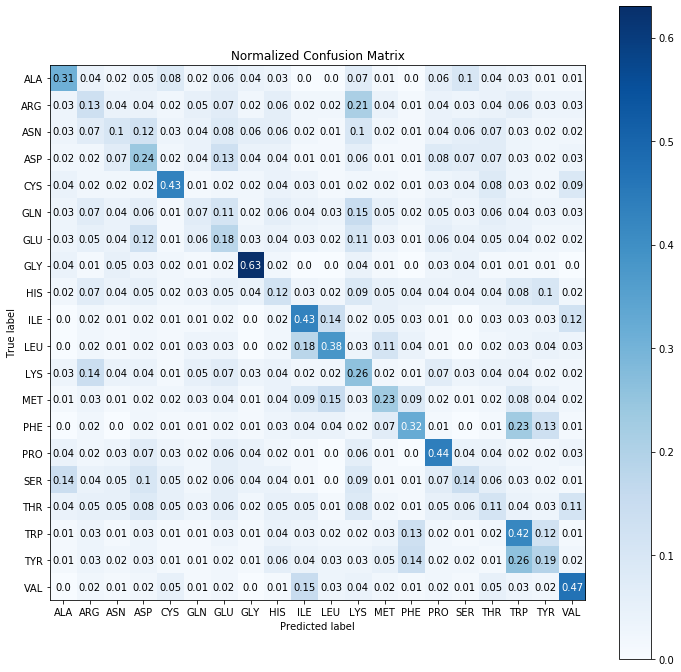

In [43]:
#Define device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

#Define pre-training data transformations
transform = transforms.Compose(
[transforms.ToTensor()])

#Load Train set for inference
print('Loading trainset...')

testset = DatasetAPPM(testset_path,transform = transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=256,
                                       shuffle=False, num_workers=0)
print('Validationset loaded.')

#Load Net model
model = TheNet()
model.load_state_dict(torch.load(weights_path + 'weights.pth'))
model.to(device)

print('Neural network evaluation mode activated!!!')
model.eval()

all_labels = []
all_predictions = []

with torch.no_grad():
  for data in testloader:
      grids, labels, resIdx = data
        
      # send data to device
      grids = grids.to(device)
      labels = labels.to(device)
    
      print('Labels: ',labels)
      outputs = model(grids)
      _, prediction = torch.max(outputs, 1)

      all_labels = all_labels + labels.cpu().numpy().tolist()
      all_predictions = all_predictions + prediction.cpu().tolist()
      print(outputs)

#Translate id to class names
all_labels = id_to_class(all_labels)
all_predictions = id_to_class(all_predictions)

cm = confusion_matrix(all_labels, all_predictions)

ax = skplt.metrics.plot_confusion_matrix(all_labels,all_predictions,normalize=True,figsize=(12,12))
ax.set_ylim(len(cm)-0.5, -0.5) #Bug correction for matplotlib 3.1.1 version

#Save on eps format for vectorized image
plt.savefig(weights_path + 'confusion_matrix.eps')
#Save on png formart for easy visualization
plt.savefig(weights_path + 'confusion_matrix.png')

print('USED DATASET: ', testset_path)